# Clustering Models Comparisson with PCA (%95)

Assessing model accuracy (10-Fold Cross-Validation) and Response time

- Logistic Regression
- k-Nearest Neighbors
- LDA (Linear Discriminant Analysis)
- QDA (Quadratic Discriminant Analysis)
- Naive Bayes
- Tree-based Approaches
- Support Vector Machines (SVM)

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import numpy as np
import seaborn as sns


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import time

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

In [3]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 1)
trainingPercent = 0.8
iterations = 30

# 1. Data Preparation

## 1.1 Load the data

In [4]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 1.2 Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales (i.e PCA is very sensitive to scales). 

In [5]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)

## 1.3 PCA Projection (%95)

In [77]:
from sklearn.decomposition import PCA

X = data.drop(columns=["WeakLinks"])

pca = PCA(0.95)
X = pca.fit_transform(X)
print(X.shape)

(2085, 22)


PCA has reduce the predictor dimension from 30 to 22

## 1.2 Split it into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

y = data["WeakLinks"]

y_train, y_test, X_train, X_test  = train_test_split(y, X, train_size = trainingPercent, random_state=5)

# 2. Create the Models

## 2.1 Logistic Regression

Maximum accuracy:  0.565947242206235 at C = 9


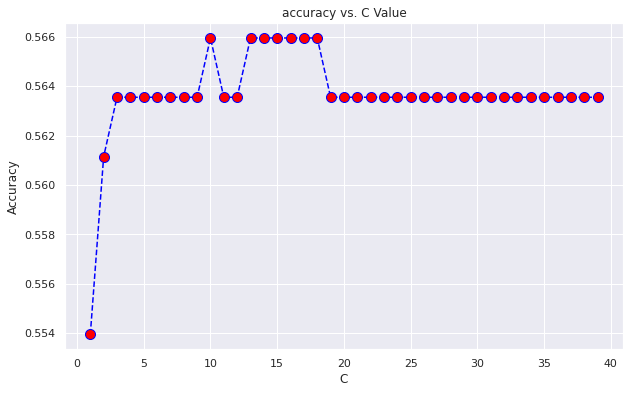

In [8]:
acc = []
for i in range(1,40):
    lr = LogisticRegression(solver='liblinear', C=i, random_state=0)
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at C =",acc.index(max(acc)))

In [16]:
# C=3
lr = LogisticRegression(solver='liblinear', C=10, random_state=0)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(preds_lr, y_test)
print(accuracy_lr)

0.565947242206235


In [17]:
lr_cv_scores = cross_val_score(lr, X, y, scoring='accuracy', cv = kfolds)

print(lr_cv_scores.min())
print(lr_cv_scores.mean())
print(lr_cv_scores.max())

0.5023923444976076
0.5487003128450497
0.6009615384615384


In [18]:
arr_latency_lr = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lr = lr.predict(X_test)
    end_time = time.time()
    latency_lr = (end_time - start_time) * 1000
    arr_latency_lr.append(latency_lr)
    
np.mean(arr_latency_lr)

0.13594627380371094

In [19]:
lr_cv_results = cross_validate(lr, X_train, y_train, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(lr_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(lr_cv_results['score_time'].mean() * 1000))

Test score:	0.5354123079142918
Scoring time:	0.9065866470336914


## 2.2 k-Nearest Neighbors (kNN)

Minimum error:- 0.407673860911271 at K = 11


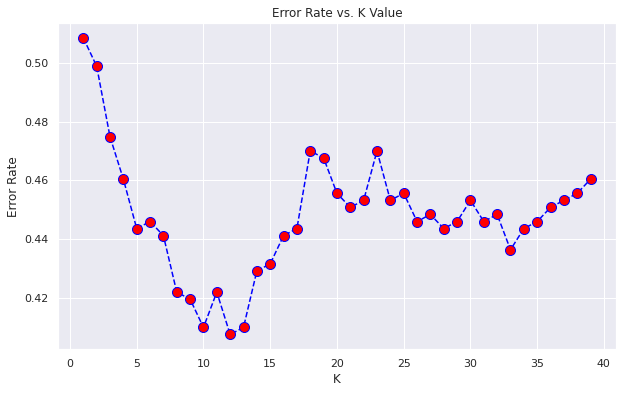

In [20]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:  0.592326139088729 at K = 11


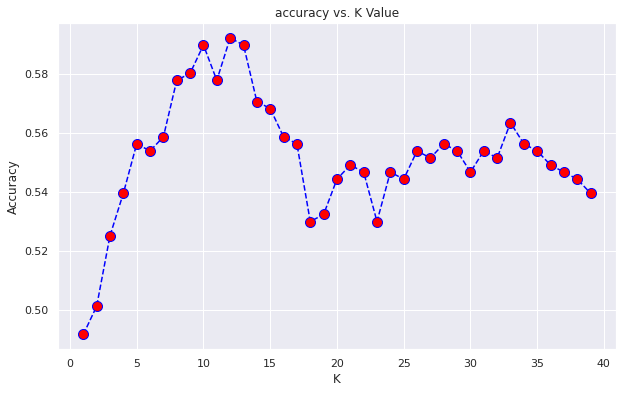

In [21]:
acc = []
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)))

In [22]:
knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(preds_knn, y_test)
print(accuracy_knn)

0.5779376498800959


In [23]:
knn_cv_scores = cross_val_score(knn, X, y, scoring='accuracy', cv = kfolds)

print(knn_cv_scores.min())
print(knn_cv_scores.mean())
print(knn_cv_scores.max())

0.5215311004784688
0.5505957857931542
0.5789473684210527


In [24]:
arr_latency_knn = []

for i in range(0, iterations):
    start_time = time.time()
    preds_knn = knn.predict(X_test)
    end_time = time.time()
    latency_knn = (end_time - start_time) * 1000
    arr_latency_knn.append(latency_knn)
    
np.mean(arr_latency_knn)

52.788615226745605

In [25]:
knn_cv_results = cross_validate(knn, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(knn_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(knn_cv_results['score_time'].mean() * 1000))

Test score:	0.5505957857931542
Scoring time:	25.27644634246826


## 2.3 LDA (Linear Discriminant Analysis)

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(preds_lda, y_test)
print(accuracy_lda)

0.5443645083932853


In [27]:
lda_cv_scores = cross_val_score(lda, X, y, scoring='accuracy', cv = kfolds)

print(lda_cv_scores.min())
print(lda_cv_scores.mean())
print(lda_cv_scores.max())

0.47596153846153844
0.5295086492454915
0.5865384615384616


In [28]:
arr_latency_lda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lda = lda.predict(X_test)
    end_time = time.time()
    latency_lda = (end_time - start_time) * 1000
    arr_latency_lda.append(latency_lda)
    
np.mean(arr_latency_lda)

0.1490910847981771

In [29]:
lda_cv_results = cross_validate(lda, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(lda_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(lda_cv_results['score_time'].mean() * 1000))

Test score:	0.5295086492454915
Scoring time:	0.9824991226196288


## 2.4 QDA (Quadratic Discriminant Analysis)

In [30]:
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(preds_qda, y_test)
print(accuracy_qda)

0.5443645083932853


In [31]:
qda_cv_scores = cross_val_score(qda, X, y, scoring='accuracy', cv = kfolds)

print(qda_cv_scores.min())
print(qda_cv_scores.mean())
print(qda_cv_scores.max())

0.47596153846153844
0.5295086492454915
0.5865384615384616


In [32]:
arr_latency_qda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_qda = qda.predict(X_test)
    end_time = time.time()
    latency_qda = (end_time - start_time) * 1000
    arr_latency_qda.append(latency_qda)
    
np.mean(arr_latency_qda)

0.13300577799479166

In [33]:
qda_cv_results = cross_validate(qda, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(qda_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(qda_cv_results['score_time'].mean() * 1000))

Test score:	0.5295086492454915
Scoring time:	1.1214017868041992


## 2.5 Naive Bayes

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(preds_nb, y_test)
print(accuracy_nb)

0.5347721822541966


In [35]:
nb_cv_scores = cross_val_score(nb, X, y, scoring='accuracy', cv = kfolds)

print(nb_cv_scores.min())
print(nb_cv_scores.mean())
print(nb_cv_scores.max())

0.507177033492823
0.5213447736474051
0.5454545454545454


In [36]:
arr_latency_nb = []

for i in range(0, iterations):
    start_time = time.time()
    preds_nb = nb.predict(X_test)
    end_time = time.time()
    latency_nb = (end_time - start_time) * 1000
    arr_latency_nb.append(latency_nb)
    
np.mean(arr_latency_nb)

1.396624247233073

In [37]:
nb_cv_results = cross_validate(nb, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(nb_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(nb_cv_results['score_time'].mean() * 1000))

Test score:	0.5213447736474051
Scoring time:	1.2207984924316406


## 2.6 Tree-based Approaches

### Decision Tree Classifier

In [38]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

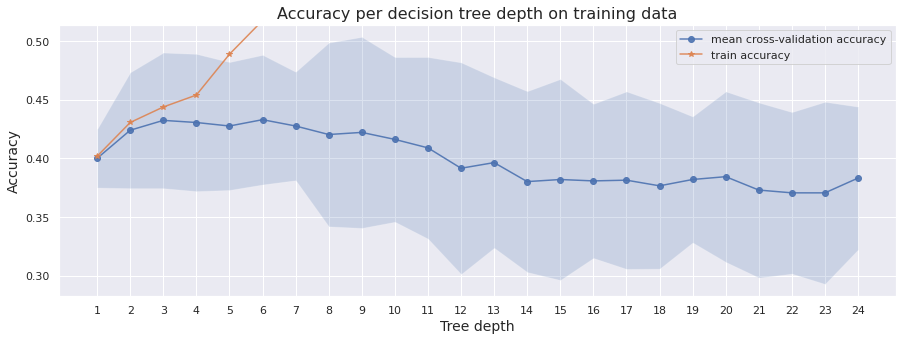

In [39]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [40]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-6 tree achieves the best mean cross-validation accuracy 43.28331 +/- 2.76212% on training dataset


In [41]:
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train, y_train)
preds_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(preds_dtc, y_test)
print(accuracy_dtc)

0.49160671462829736


In [42]:
dtc_cv_scores = cross_val_score(dtc, X, y, scoring='accuracy', cv = kfolds)

print(dtc_cv_scores.min())
print(dtc_cv_scores.mean())
print(dtc_cv_scores.max())

0.3827751196172249
0.46140044166359956
0.49760765550239233


In [43]:
arr_latency_dtc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_dtc = dtc.predict(X_test)
    end_time = time.time()
    latency_dtc = (end_time - start_time) * 1000
    arr_latency_dtc.append(latency_dtc)
    
np.mean(arr_latency_dtc)

0.19404888153076172

In [44]:
dtc_cv_results = cross_validate(dtc, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(dtc_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(dtc_cv_results['score_time'].mean() * 1000))

Test score:	0.45995813397129187
Scoring time:	0.8853673934936523


### Random Forest Classifier

In [45]:
def run_cross_validation_on_forest_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(bootstrap='False', max_depth=depth, n_estimators=200)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
def plot_cross_validation_on_forest_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

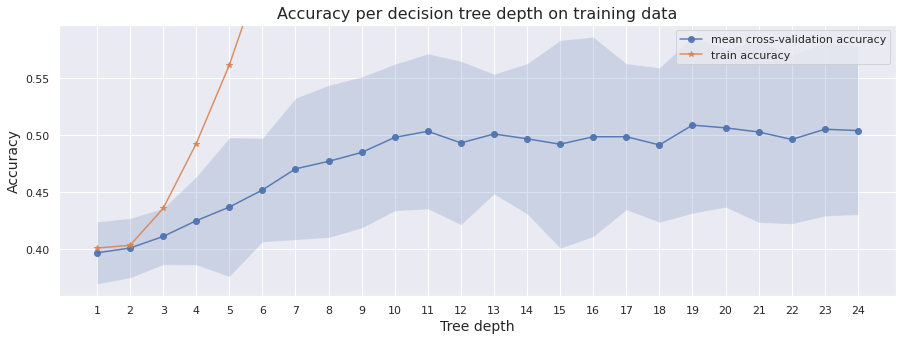

In [46]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_forest_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree depth on training data')

In [47]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-19 tree achieves the best mean cross-validation accuracy 50.89893 +/- 3.86917% on training dataset


In [48]:
rfc = RandomForestClassifier(bootstrap='False', max_depth=19, n_estimators=200)
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(preds_rfc, y_test)
print(accuracy_rfc)

0.5779376498800959


In [49]:
rfc_cv_scores = cross_val_score(rfc, X, y, scoring='accuracy', cv = kfolds)

print(rfc_cv_scores.min())
print(rfc_cv_scores.mean())
print(rfc_cv_scores.max())

0.45933014354066987
0.5294994479205005
0.5933014354066986


In [50]:
arr_latency_rfc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_rfc = rfc.predict(X_test)
    end_time = time.time()
    latency_rfc = (end_time - start_time) * 1000
    arr_latency_rfc.append(latency_rfc)
    
np.mean(arr_latency_rfc)

36.66865030924479

In [51]:
rfc_cv_results = cross_validate(rfc, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(rfc_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(rfc_cv_results['score_time'].mean() * 1000))

Test score:	0.5251587228560912
Scoring time:	34.29546356201172


## 2.7 Support Vector Machines (SVM)

### Linear kernel

In [52]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 50]
}

cv_svm_linear_first = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_first.fit(X_train, y_train)

print(cv_svm_linear_first.best_params_)
c = cv_svm_linear_first.best_params_['C']

{'C': 10}


In [53]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1]
}

cv_svm_linear_second = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_second.fit(X_train, y_train)

print(cv_svm_linear_second.best_params_)
c = cv_svm_linear_second.best_params_['C']

{'C': 9}


In [54]:
svm_linear = SVC(C=9, kernel='linear')
svm_linear.fit(X_train, y_train)
preds_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(preds_svm_linear, y_test)
print(accuracy_svm_linear)

0.5827338129496403


In [55]:
svm_linear_cv_scores = cross_val_score(svm_linear, X, y, scoring='accuracy', cv = kfolds)

print(svm_linear_cv_scores.min())
print(svm_linear_cv_scores.mean())
print(svm_linear_cv_scores.max())

0.5119617224880383
0.5654904306220095
0.6057692307692307


In [56]:
arr_latency_svm_linear = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_linear = svm_linear.predict(X_test)
    end_time = time.time()
    latency_svm_linear = (end_time - start_time) * 1000
    arr_latency_svm_linear.append(latency_svm_linear)
    
np.mean(arr_latency_svm_linear)

20.964360237121582

In [57]:
svm_linear_cv_results = cross_validate(svm_linear, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_linear_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_linear_cv_results['score_time'].mean() * 1000))

Test score:	0.5654904306220095
Scoring time:	14.468216896057129


### Radial Kernel

In [58]:
params = {
    'C': [0.1, 1, 3, 5, 10, 20, 30],
    'gamma': [00.1, 0.1, 1, 5]
}

cv_svm_radial_first = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_first.fit(X_train, y_train)
c = cv_svm_radial_first.best_params_['C']
gamma = cv_svm_radial_first.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 20, 'gamma': 0.1}


In [59]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1]
}

cv_svm_radial_second = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_second.fit(X_train, y_train)
c = cv_svm_radial_second.best_params_['C']
gamma = cv_svm_radial_second.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 20, 'gamma': 0.1}


In [60]:
svm_radial = SVC(C=20, kernel='rbf',gamma=0.1)
svm_radial.fit(X_train, y_train)
preds_svm_radial = svm_radial.predict(X_test)
accuracy_svm_radial = accuracy_score(preds_svm_radial, y_test)
print(accuracy_svm_radial)

0.5899280575539568


In [61]:
svm_radial_cv_scores = cross_val_score(svm_radial, X, y, scoring='accuracy', cv = kfolds)

print(svm_radial_cv_scores.min())
print(svm_radial_cv_scores.mean())
print(svm_radial_cv_scores.max())

0.5288461538461539
0.5827199116672801
0.625


In [62]:
arr_latency_svm_radial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_radial = svm_radial.predict(X_test)
    end_time = time.time()
    latency_svm_radial = (end_time - start_time) * 1000
    arr_latency_svm_radial.append(latency_svm_radial)
    
np.mean(arr_latency_svm_radial)

107.04959233601888

In [63]:
svm_radial_cv_results = cross_validate(svm_radial, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_radial_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_radial_cv_results['score_time'].mean() * 1000))

Test score:	0.5827199116672801
Scoring time:	31.049299240112305


### Polynomial Kernel

In [64]:
params = {
    'C': [0.1, 1, 5, 10],
    'gamma': [0.01, 0.1, 1, 5],
    'degree':[2, 3, 4]
}

cv_svm_polynomial_first = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_first.fit(X_train, y_train)
c = cv_svm_polynomial_first.best_params_['C']
gamma = cv_svm_polynomial_first.best_params_['gamma']
degree = cv_svm_polynomial_first.best_params_['degree']
print(cv_svm_polynomial_first.best_params_)

{'C': 1, 'degree': 3, 'gamma': 1}


In [65]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1],
    'degree': [degree - 1, degree - 0.5, degree, degree + 0.5, degree + 1]
}

cv_svm_polynomial_second = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_second.fit(X_train, y_train)
c = cv_svm_polynomial_second.best_params_['C']
gamma = cv_svm_polynomial_second.best_params_['gamma']
degree = cv_svm_polynomial_second.best_params_['degree']
print(cv_svm_polynomial_second.best_params_)

{'C': 1, 'degree': 3, 'gamma': 1}


In [66]:
svm_polynomial = SVC(C=1, kernel='poly', degree=3, gamma = 1)
svm_polynomial.fit(X_train, y_train)
preds_svm_polynomial = svm_polynomial.predict(X_test)
accuracy_svm_polynomial = accuracy_score(preds_svm_polynomial, y_test)
print(accuracy_svm_polynomial)

0.60431654676259


In [67]:
svm_polynomial_cv_scores = cross_val_score(svm_polynomial, X, y, scoring='accuracy', cv = kfolds)

print(svm_polynomial_cv_scores.min())
print(svm_polynomial_cv_scores.mean())
print(svm_polynomial_cv_scores.max())

0.507177033492823
0.5554011777695987
0.6124401913875598


In [68]:
arr_latency_svm_polynomial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_polynomial = svm_polynomial.predict(X_test)
    end_time = time.time()
    latency_svm_polynomial = (end_time - start_time) * 1000
    arr_latency_svm_polynomial.append(latency_svm_polynomial)
    
np.mean(arr_latency_svm_polynomial)

24.500012397766113

In [69]:
svm_polynomial_cv_results = cross_validate(svm_polynomial, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_polynomial_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_polynomial_cv_results['score_time'].mean() * 1000))

Test score:	0.5554011777695987
Scoring time:	14.191198348999023


# Assessing Model Performances

## Model Accuracies

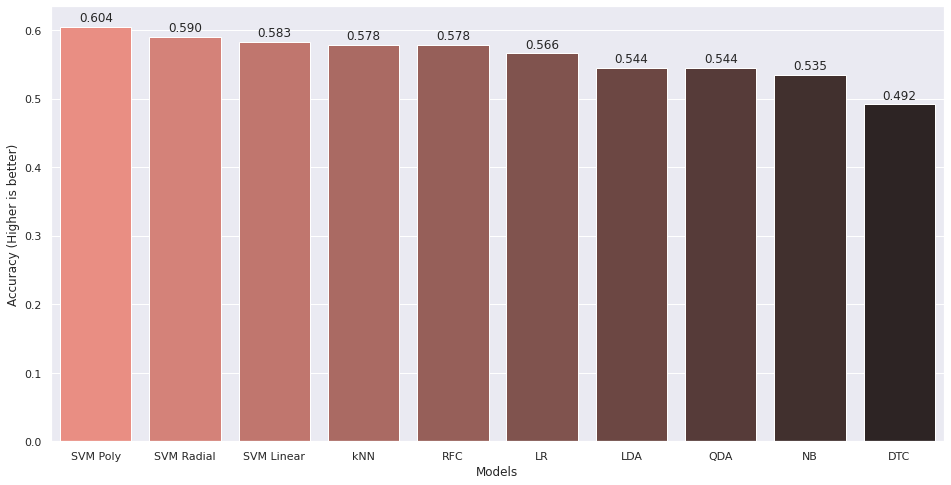

In [70]:
results = pd.DataFrame({
    "Accuracy":[
        accuracy_lr,
        accuracy_knn,
        accuracy_lda,
        accuracy_qda,
        accuracy_nb,
        accuracy_dtc,
        accuracy_rfc,
        accuracy_svm_linear,
        accuracy_svm_radial,
        accuracy_svm_polynomial
        
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (Higher is better)")

plt.show()

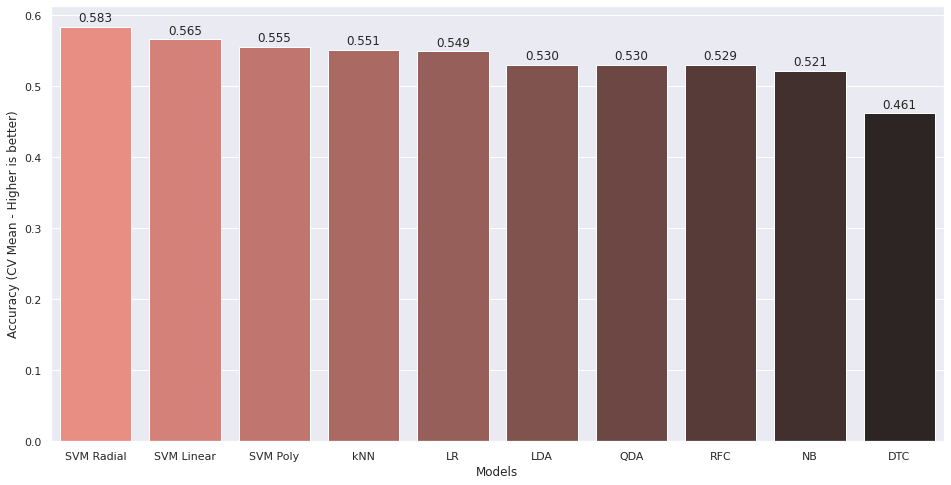

In [71]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.mean(),
        knn_cv_scores.mean(),
        lda_cv_scores.mean(),
        qda_cv_scores.mean(),
        nb_cv_scores.mean(),
        dtc_cv_scores.mean(),
        rfc_cv_scores.mean(),
        svm_linear_cv_scores.mean(),
        svm_radial_cv_scores.mean(),
        svm_polynomial_cv_scores.mean()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Mean - Higher is better)")

plt.show()

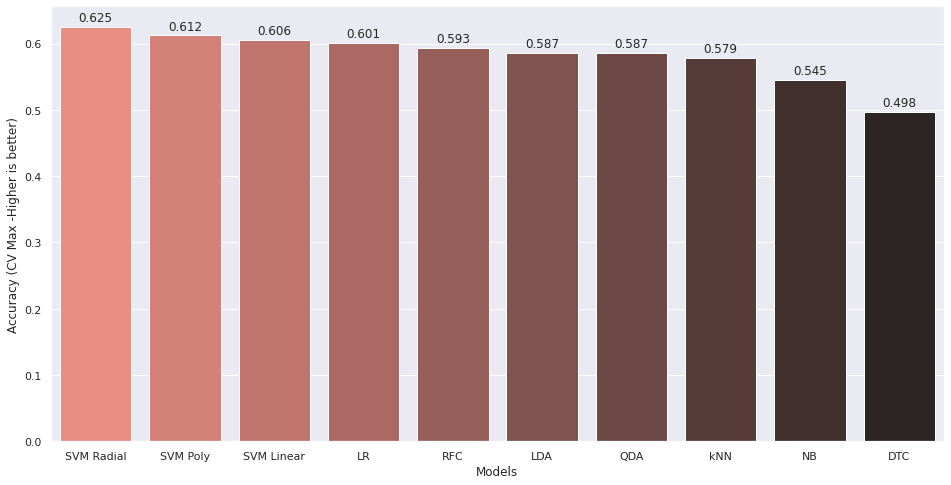

In [72]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.max(),
        knn_cv_scores.max(),
        lda_cv_scores.max(),
        qda_cv_scores.max(),
        nb_cv_scores.max(),
        dtc_cv_scores.max(),
        rfc_cv_scores.max(),
        svm_linear_cv_scores.max(),
        svm_radial_cv_scores.max(),
        svm_polynomial_cv_scores.max()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Max -Higher is better)")

plt.show()

## Model Response Time

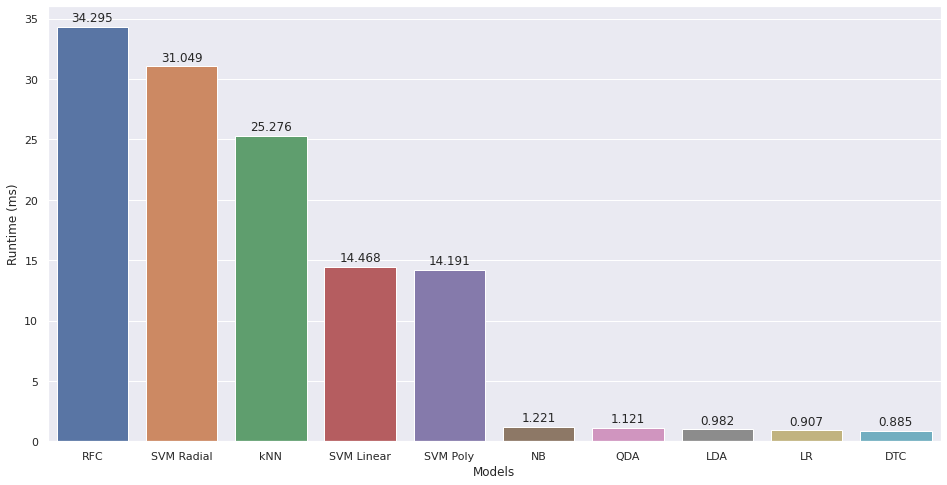

In [73]:
results = pd.DataFrame({
    "Runtime":[
        lr_cv_results['score_time'].mean() * 1000,
        knn_cv_results['score_time'].mean() * 1000,
        lda_cv_results['score_time'].mean() * 1000,
        qda_cv_results['score_time'].mean() * 1000,
        nb_cv_results['score_time'].mean() * 1000,
        dtc_cv_results['score_time'].mean() * 1000,
        rfc_cv_results['score_time'].mean() * 1000,
        svm_linear_cv_results['score_time'].mean() * 1000,
        svm_radial_cv_results['score_time'].mean() * 1000,
        svm_polynomial_cv_results['score_time'].mean() * 1000
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()

## Model Response Time (remove outlier)

In [74]:
def removeOutliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

In [75]:
arr_latency_lr_n = removeOutliers(arr_latency_lr)
arr_latency_knn_n = removeOutliers(arr_latency_knn)
arr_latency_lda_n = removeOutliers(arr_latency_lda)
arr_latency_qda_n = removeOutliers(arr_latency_qda)
arr_latency_nb_n = removeOutliers(arr_latency_nb)
arr_latency_dtc_n = removeOutliers(arr_latency_dtc)
arr_latency_rfc_n = removeOutliers(arr_latency_rfc)
arr_latency_svm_linear_n = removeOutliers(arr_latency_svm_linear)
arr_latency_svm_radial_n = removeOutliers(arr_latency_svm_radial)
arr_latency_svm_polynomial_n = removeOutliers(arr_latency_svm_polynomial)

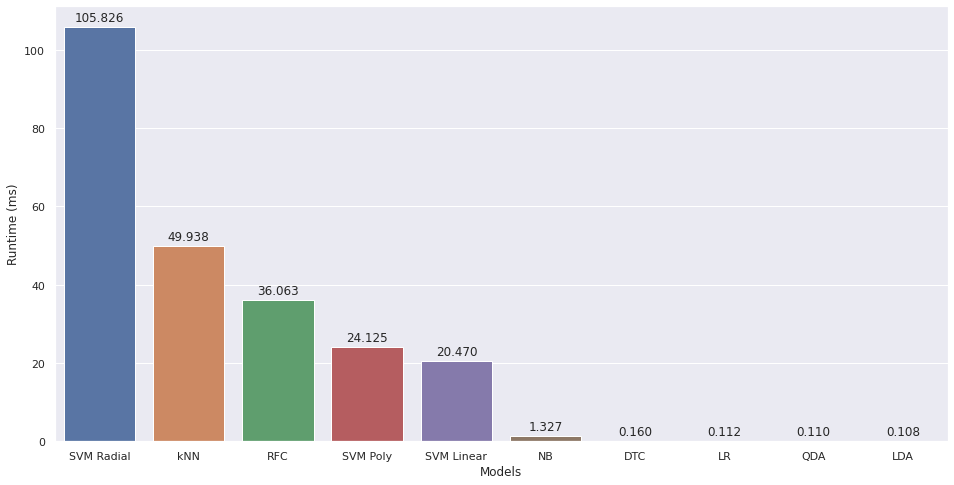

In [76]:
results = pd.DataFrame({
    "Runtime":[
        np.mean(arr_latency_lr_n),
        np.mean(arr_latency_knn_n),
        np.mean(arr_latency_lda_n),
        np.mean(arr_latency_qda_n),
        np.mean(arr_latency_nb_n),
        np.mean(arr_latency_dtc_n),
        np.mean(arr_latency_rfc_n),
        np.mean(arr_latency_svm_linear_n),
        np.mean(arr_latency_svm_radial_n),
        np.mean(arr_latency_svm_polynomial_n)
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()